## Análise de Dados de Avistamentos | Operação Prato | Parte 1

A Operação Prato foi uma das mais conhecidas investigações militares brasileiras relacionadas a avistamentos de objetos voadores não identificados (OVNIs), conduzida pela Força Aérea Brasileira no final dos anos 1970, no estado do Pará. Durante esse período, diversos relatórios e relatos de fenômenos aéreos não explicados foram documentados, fornecendo uma vasta quantidade de dados sobre o assunto.

Este notebook tem como objetivo realizar uma análise exploratória de dados (EDA) dos relatos registrados durante a Operação Prato. Utilizando técnicas de visualização de dados e análise estatística, vamos buscar entender padrões temporais, geográficos e de comportamento dos fenômenos descritos.

Estrutura dos Dados
O arquivo utilizado, dados-op.csv, contém uma série de colunas detalhando informações dos relatos, como:

Data e hora do avistamento,
Localização geográfica (latitude e longitude),
Características observadas (cor, forma, tamanho aparente),
Movimento e velocidade dos objetos,
Distância e altitude estimadas,
Perfis dos observadores

Os dados foram retirados do documento "MINISTÉRIO DA AERONÁUTICA - 1º COMANDO AÉREO REGIONAL - 2ª SEÇÃO DO ESTADO MAIOR REGISTROS DE OBSERVAÇÕES DE OVNI
(Nºs 001 a 130)" de 1978, registrado no Arquivo Nacional Brasileiro sob o código **BR DFANBSB ARX.0.0.184**. Os dados foram extraídos do documento e compilados no arquivo dados-op.csv.

Taxonomias foram criadas para clusterizar as cores e formatos dos objetos avistados.

A análise dos dados foi conduzida pelo jornalista Cesar Gaglioni, colaborador da pesquisa do podcast, com coordenação e direção de Andrei Fernandes e Ivan Mizanzuk, e produção de Ira Morato. O código foi desenvolvido em Python.

## Seção 1 | Análise Temporal

Na primeira seção da análise, os dados temporais presentes no documento são analisados.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Carregando o arquivo CSV
df = pd.read_csv('dados-op.csv', index_col='REG Nº')

# Convertendo a coluna 'DATA' para o formato de data do pandas
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

# Criando novas colunas para o ano, mês e dia da semana
df['Ano'] = df['DATA'].dt.year
df['Mês'] = df['DATA'].dt.month
df['Dia da Semana'] = df['DATA'].dt.day_name()
df['Mês'] = df['DATA'].dt.month_name()

<ipython-input-29-812653cda1e8>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')


In [30]:
# Convertendo a coluna 'HORA' para o formato de horas do pandas
df['HORA'] = pd.to_datetime(df['HORA'], format='%H:%M', errors='coerce').dt.hour

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

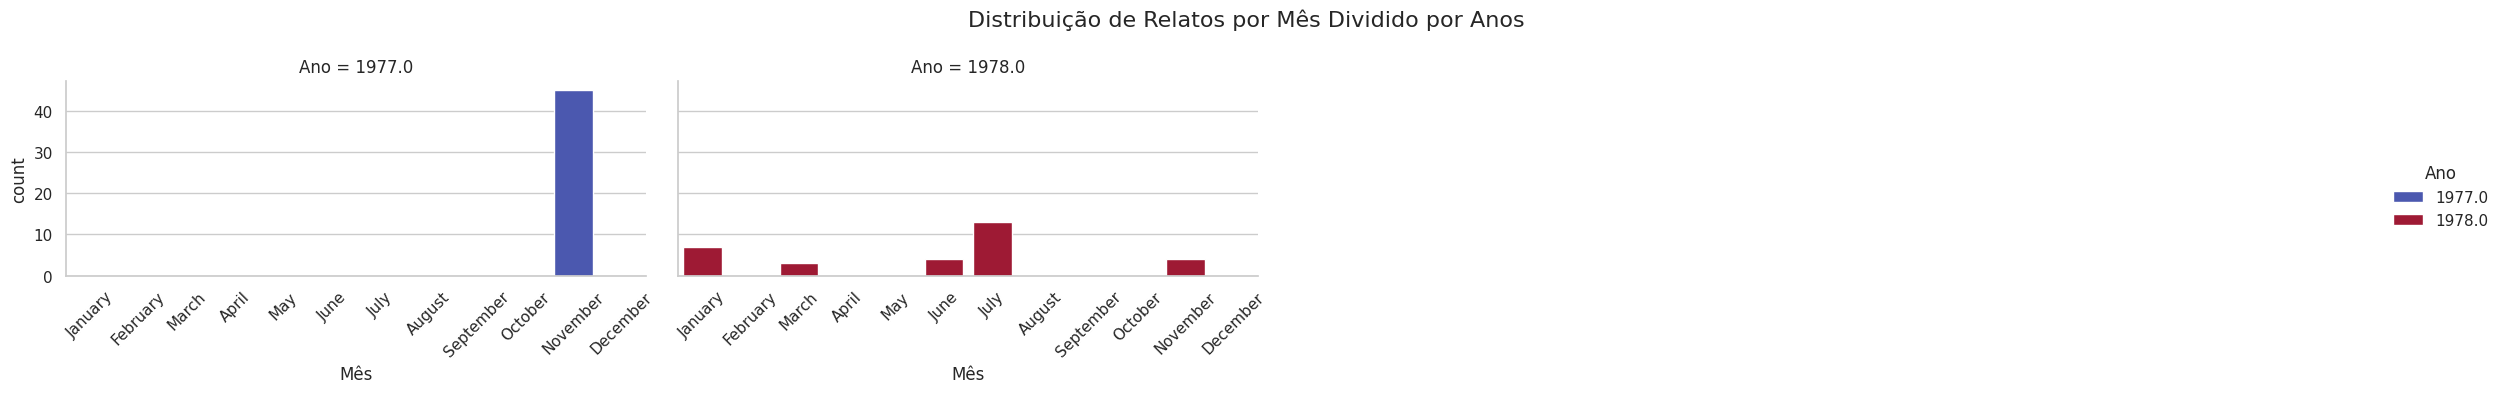

In [31]:
# Filtrando os dados para remover valores nulos na coluna de ano e mês
df_filtered = df.dropna(subset=['Ano', 'Mês'])


# Gráfico de distribuição por mês, separado por anos (facetado)
g = sns.catplot(data=df_filtered, x='Mês', kind='count', hue='Ano', palette='coolwarm', col='Ano',
                col_wrap=4, height=4, aspect=1.5, order=['January', 'February', 'March', 'April', 'May',
                                                         'June', 'July', 'August', 'September', 'October',
                                                         'November', 'December'])

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuição de Relatos por Mês Dividido por Anos', fontsize=16)
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-32-c4f8deb6c019>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Dia da Semana', palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


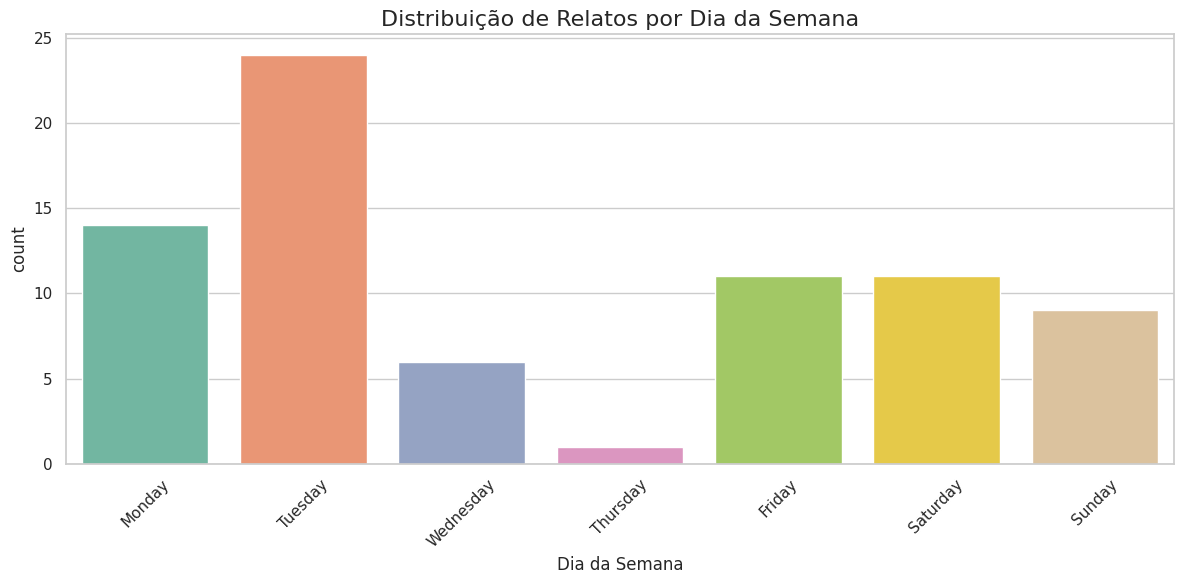

In [32]:
# Gráfico da distribuição de relatos por dia da semana
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Dia da Semana', palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribuição de Relatos por Dia da Semana', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Seção 2 | Análises geográficas

In [33]:
# Contar o número de relatos por cidade
df_cidade = df['CIDADE'].value_counts().reset_index()
df_cidade.columns = ['Cidade', 'Relatos']

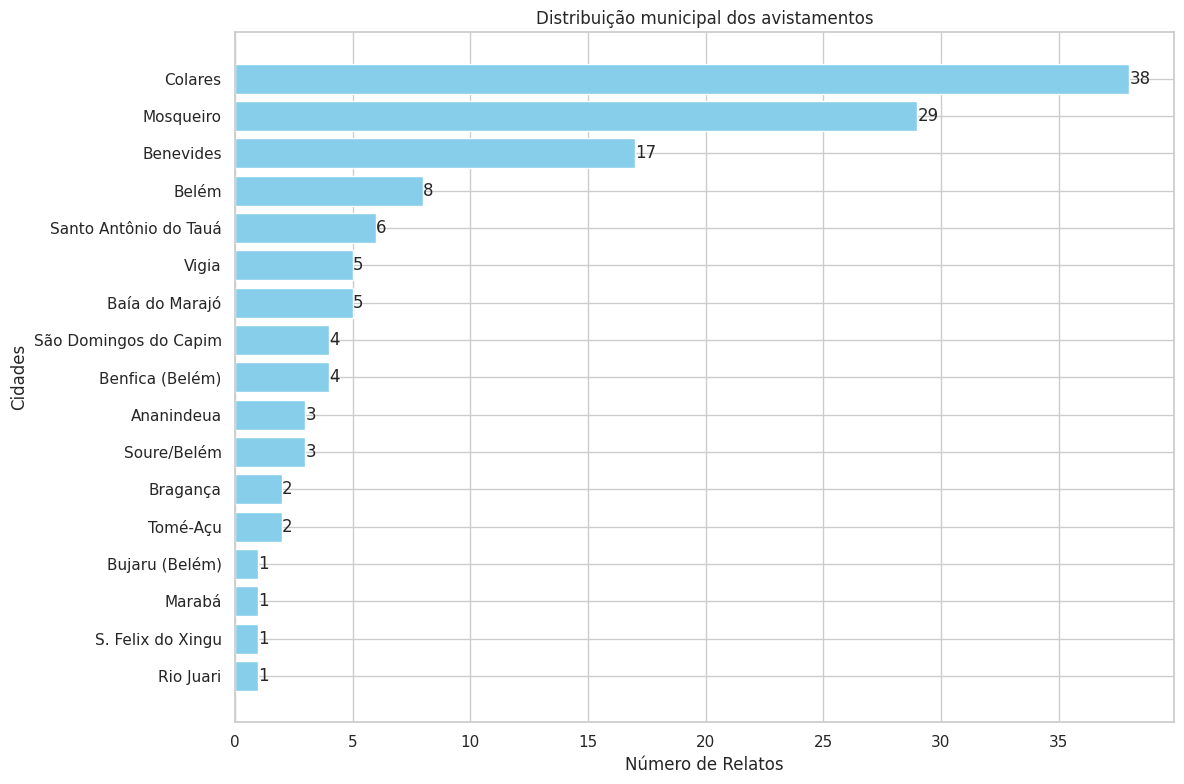

In [41]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(df_cidade['Cidade'], df_cidade['Relatos'], color='skyblue')

# Adicionar rótulos de dados ao lado das barras
for bar in bars:
    plt.text(
        bar.get_width(),  # Posição X: largura da barra (número de relatos)
        bar.get_y() + bar.get_height()/2,  # Posição Y: centro da barra
        f'{int(bar.get_width())}',  # Texto: valor da barra (número de relatos)
        va='center'  # Alinhamento vertical: centro
    )

# Configurações visuais
plt.xlabel('Número de Relatos')
plt.ylabel('Cidades')
plt.title('Distribuição municipal dos avistamentos')
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a cidade com mais relatos fique no topo
plt.tight_layout()

# Exibir o gráfico
plt.show()

## Análise de forma e cor dos objetos

<ipython-input-46-ae46b91c6a0f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=forma_freq, x='Frequência', y='Forma', palette='Blues_d')


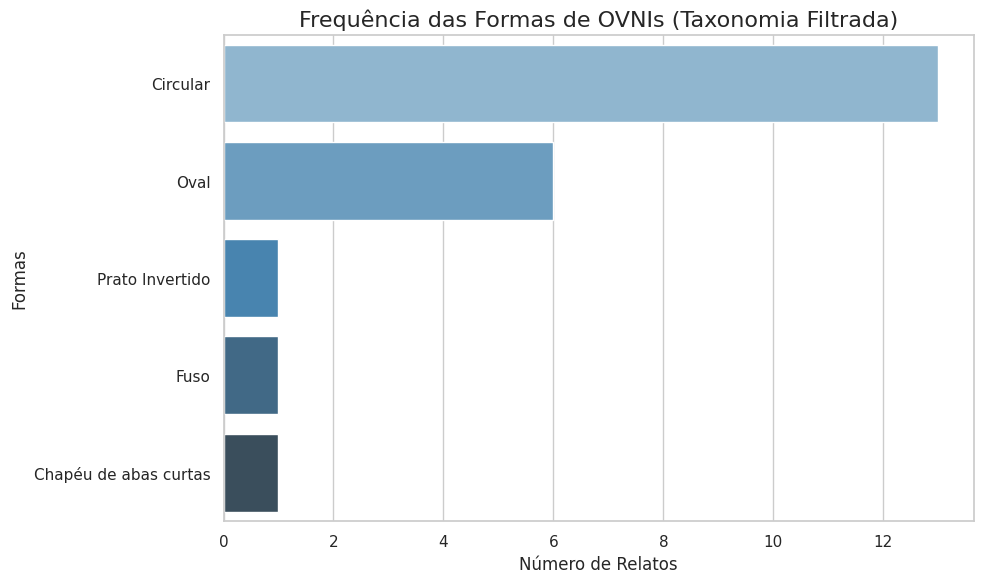

In [46]:

# Criar uma lista de formas válidas (geométricas) - você pode adicionar ou remover termos com base nos dados
formas_validas = ['Circular', 'Oval', 'Cilíndrica', 'Fuso', 'Prato Invertido', 'Chapéu de abas curtas']

# Filtrar o DataFrame para manter apenas as linhas onde a 'FORMA (TAXONOMIA)' está na lista de formas válidas
df_formas_filtrado = df[df['FORMA (TAXONOMIA)'].isin(formas_validas)]


# Contar a frequência de cada forma
forma_freq = df_formas_filtrado['FORMA (TAXONOMIA)'].value_counts().reset_index()
forma_freq.columns = ['Forma', 'Frequência']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=forma_freq, x='Frequência', y='Forma', palette='Blues_d')
plt.title('Frequência das Formas de OVNIs (Taxonomia Filtrada)', fontsize=16)
plt.xlabel('Número de Relatos')
plt.ylabel('Formas')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Número de avistamentos para cada cor:
                             Cor  Frequência
0                        Amarela          38
1            Amarela avermelhada          21
2                        Amarelo          17
3                     Indefinida           9
4                 Corpo Luminoso           8
5                    Avermelhada           8
6                  Amarela clara           5
7                           Azul           5
8                        Azulada           2
9                  Amarela fosca           2
10      Azulada, brilho metálico           2
11  Cinza clara, brilho metálico           2
12          Luminosidade Reflexa           1
13                   Cinza clara           1
14                        Branca           1
15                         Cinza           1
16                       Incolor           1
17                      Prateado           1
18                Branca azulada           1
19                          Oval           1


<ipython-input-49-ff69754653b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=cor_freq, x='Frequência', y='Cor', palette='Reds_d')


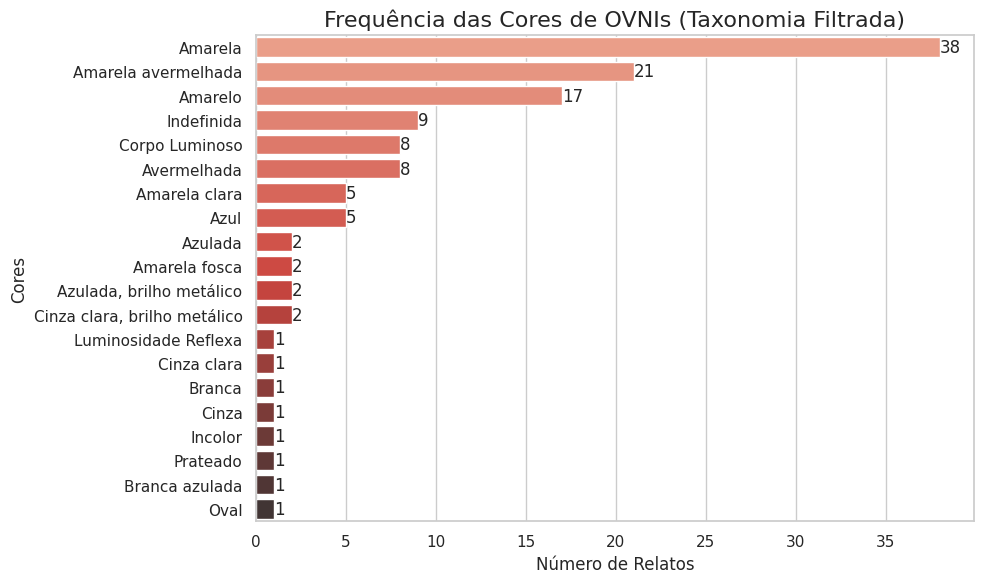

In [49]:
# Remover o valor específico "Quadrada, semelhante ao automóvel OPALA (Cor opaca)"
df = df[df['COR TAXONOMIA'] != 'Quadrada, semelhante ao automóvel OPALA (Cor opaca)']

# Contar a frequência de cada cor
cor_freq = df['COR TAXONOMIA'].value_counts().reset_index()
cor_freq.columns = ['Cor', 'Frequência']

# Mostrar o número de avistamentos para cada cor
print("Número de avistamentos para cada cor:")
print(cor_freq)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=cor_freq, x='Frequência', y='Cor', palette='Reds_d')

# Adicionar os rótulos de dados ao final de cada barra
for index, value in enumerate(cor_freq['Frequência']):
    plt.text(value, index, f'{value}', va='center')

plt.title('Frequência das Cores de OVNIs (Taxonomia Filtrada)', fontsize=16)
plt.xlabel('Número de Relatos')
plt.ylabel('Cores')

# Exibir o gráfico
plt.tight_layout()
plt.show()